In [1]:
import numpy as np
# matplotlib and mpl_toolkits are not necessary. We employ them for the sole purpose of visualizing the results.  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
observation = 1000

# creating a two variable linear method:
xs = np.random.uniform(low = 10,high = -10,size = (observation,1))
zs = np.random.uniform(low = 10,high = -10,size = (observation,1))

#input matrxi should be of dimesion n x k, in our case it will be 1000(number of observations) x 2(number of variable)
inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


### Creating the target values

In [3]:
# We want to "make up" a function, use the ML methodology, and see if the algorithm has learned it.
# We add a small random noise to the function i.e. f(x,z) = 2x - 3z + 5 + small noise
noise = np.random.uniform(-1, 1, (observation,1))

# Produce the targets according to the f(x,z) = 13xs + 7zs - 12+noise  definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
# 5x^2+3x-4
# f(x,z) = 2x - 3z + 5 + <small noise>
targets = 2*xs - 3*zs + 5 + noise

# Check the shape of the targets just in case. It should be n x m, where m is the number of output variables, so 1000 x 1.
print (targets.shape)

(1000, 1)


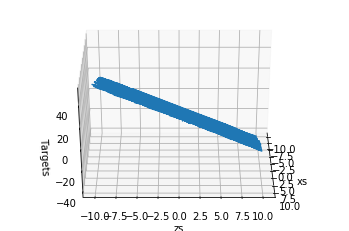

In [4]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
# Plotting according to the conventional matplotlib.pyplot syntax
# Declare the figure
targets = targets.reshape(observation,)
fig = plt.figure()
# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')
# Choose the axes.
ax.plot(xs, zs,targets)
# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
# with azim = 0 we can see all the three variable are in a linear relationship
ax.view_init(azim=0)
plt.show()
# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(observation,1)

In [5]:
# We will initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output number of biases are mostly equal to number of Target variables 
#The bias is a scalar or we can say 1 x 1 matrix
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

print ("weights",weights)
print ("biases",biases)

weights [[-0.01607402]
 [-0.04849681]]
biases [0.0816736]


# Train the Model

We iterate over our training dataset 100 times. That may work well with a learning rate of 0.02. a lower learning rate would need more iterations, while a higher learning rate would need less iterations keeping in mind that a high learning rate may cause the loss to diverge to infinity, instead of converge to 0

In [6]:
learning_rate = 0.05
#learning_rate = 0.2

# How to do the iterations

1. Calculate the outputs
2. Compare outputs through the loss(L2 - Norm as we are working on a linear regression problem)
3. Print the Loss
4. Adjust the weight and bias


In [13]:

for i in range (100):
    
    # This is the linear model: y = xw + b equation
    # Python adds the scalars to matrices element wise 
    outputs = np.dot(inputs,weights) + biases
    # The deltas are the differences between the outputs and the targets and deltas here is a vector 1000 x 1
    #in simpler words we can say deltas are the errors
    deltas = outputs - targets 
        
    # We are considering the L2-norm loss, but divided by 2
    # Moreover, we further divide it by the number of observations which will give us the mean loss
    # L2- nrom loss Formula = sum(outputs - targets) raise to the power 2
    #Divison by constant does not change the the logic of the loss as it is still lower for higher accuracy
    loss = np.sum(deltas ** 2) / 2 / observation    
 
    print (loss)
    
    deltas_scaled = deltas / observation  
    
    # Finally, we must apply the gradient descent update rules.
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # we need to make the inputs  in 2 X 1000 format to perform the dot product operation 
    # for that we can use the transpose beacsue transposing matrix does not affect the values
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    # new biases 
    biases = biases - learning_rate * np.sum(deltas_scaled) 

0.15771226706107758
0.15771226706107758
0.15771226706107758
0.1577122670610776
0.15771226706107763
0.15771226706107763
0.15771226706107758
0.15771226706107755
0.1577122670610777
0.1577122670610776
0.15771226706107763
0.15771226706107755
0.1577122670610776
0.15771226706107758
0.1577122670610776
0.15771226706107758
0.15771226706107763
0.15771226706107763
0.15771226706107758
0.15771226706107758
0.15771226706107755
0.15771226706107758
0.1577122670610776
0.1577122670610776
0.1577122670610776
0.15771226706107763
0.1577122670610776
0.15771226706107758
0.15771226706107763
0.15771226706107763
0.15771226706107763
0.15771226706107758
0.1577122670610776
0.15771226706107766
0.1577122670610776
0.1577122670610776
0.15771226706107755
0.15771226706107758
0.15771226706107758
0.15771226706107755
0.15771226706107758
0.15771226706107763
0.15771226706107758
0.15771226706107758
0.15771226706107766
0.15771226706107763
0.15771226706107758
0.15771226706107758
0.15771226706107758
0.15771226706107758
0.1577122670

In [11]:
# Somehow after multiple iterations the optimal value will be around 0.15771226706107758 with a learning rate 0.05 with multiple iterations
# Our target to find whether the loss becomes zero we can do trial adn error for that

In [14]:
#Dimensonality Check 
print(weights.shape,inputs.T.shape,deltas_scaled.shape)

#0.39592347051420274
#0.19836263411952842
#0.17161712091109252

print(0.1674294259008599-0.16742942590083623)

(2, 1) (2, 1000) (1000, 1)
2.3675506000131463e-14


In [15]:
print ("weights",weights)
print ("biases",biases)

weights [[ 2.00091908]
 [-2.99962825]]
biases [4.96983264]


# We are looking for below values for learning rate 0.05

weights [[ 2.00091908] ,[-2.99962825]] 

biases [4.96983264]
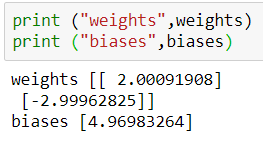

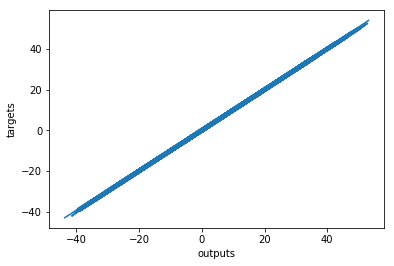

In [16]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()